In [1]:
!pip install ipympl
!pip install numpy scipy sympy matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
import sympy as sp
import utils as utl
%matplotlib widget

Define symbols HPN

In [3]:
w, s, K, Ko, wo, wz, Q, wcf = sp.symbols('w, s, K, Ko, wo, wz, Q, wcf', real=True)
H = K * (wz/wo)**2 * ((s/wz)**2 + 1)/( (s/wo)**2 + (s/(wo*Q) + 1))
sp.pprint(H)

        ⎛  2    ⎞   
      2 ⎜ s     ⎟   
  K⋅wz ⋅⎜─── + 1⎟   
        ⎜  2    ⎟   
        ⎝wz     ⎠   
────────────────────
    ⎛  2           ⎞
  2 ⎜ s         s  ⎟
wo ⋅⎜─── + 1 + ────⎟
    ⎜  2       Q⋅wo⎟
    ⎝wo            ⎠


In [4]:
# LPN

Hlpn = Ko * ((s/wz)**2 + 1)/( (s/wo)**2 + (s/(wo*Q) + 1))
sp.pprint(Hlpn)
Hlpnw = Hlpn.subs(s, w*sp.I)
Hlpnw_abs = sp.Abs(Hlpnw).simplify()
sp.pprint(Hlpnw_abs)

    ⎛  2    ⎞ 
    ⎜ s     ⎟ 
 Ko⋅⎜─── + 1⎟ 
    ⎜  2    ⎟ 
    ⎝wz     ⎠ 
──────────────
  2           
 s         s  
─── + 1 + ────
  2       Q⋅wo
wo            
         │   ⎛  2    ⎞│        
         │   ⎜ w     ⎟│        
         │Ko⋅⎜─── - 1⎟│        
         │   ⎜  2    ⎟│        
         │   ⎝wz     ⎠│        
───────────────────────────────
      _________________________
     ╱   4      2          2   
    ╱   w    2⋅w          w    
   ╱   ─── - ──── + 1 + ────── 
  ╱      4     2         2   2 
╲╱     wo    wo         Q ⋅wo  


In [5]:
Hw = H.subs(s, w*sp.I)
sp.pprint(Hw)

        ⎛    2    ⎞   
      2 ⎜   w     ⎟   
  K⋅wz ⋅⎜- ─── + 1⎟   
        ⎜    2    ⎟   
        ⎝  wz     ⎠   
──────────────────────
    ⎛    2           ⎞
  2 ⎜   w        ⅈ⋅w ⎟
wo ⋅⎜- ─── + 1 + ────⎟
    ⎜    2       Q⋅wo⎟
    ⎝  wo            ⎠


Calculate the absolute value and evaluate in Wcf

In [6]:
H_abs = sp.Abs(Hw).simplify()
# sp.pprint(H_abs)
result = H_abs.simplify()
sp.pprint(result)
result = result.subs(wz, 742.24*2*np.pi).subs(wo, 2791.63*2*np.pi).subs(Q, 5.25).subs(K, 0.416)
sp.pprint(Hlpnw_abs)
Hlpnw_abs_num = Hlpnw_abs.subs(wz, 13794.25*2*np.pi).subs(wo, 3667.63*2*np.pi).subs(Q, 5.25).subs(Ko, 0.416)
sp.pprint(Hlpnw_abs_num)
hlpn_0 = Hlpnw_abs_num.subs(w,20106.19)
sp.pprint(hlpn_0)

           │  ⎛  2    ⎞│       
           │  ⎜ w     ⎟│       
           │K⋅⎜─── - 1⎟│       
           │  ⎜  2    ⎟│       
         2 │  ⎝wz     ⎠│       
       wz ⋅│───────────│       
           │      2    │       
           │    wo     │       
───────────────────────────────
      _________________________
     ╱   4      2          2   
    ╱   w    2⋅w          w    
   ╱   ─── - ──── + 1 + ────── 
  ╱      4     2         2   2 
╲╱     wo    wo         Q ⋅wo  
         │   ⎛  2    ⎞│        
         │   ⎜ w     ⎟│        
         │Ko⋅⎜─── - 1⎟│        
         │   ⎜  2    ⎟│        
         │   ⎝wz     ⎠│        
───────────────────────────────
      _________________________
     ╱   4      2          2   
    ╱   w    2⋅w          w    
   ╱   ─── - ──── + 1 + ────── 
  ╱      4     2         2   2 
╲╱     wo    wo         Q ⋅wo  
            │                      2        │            
            │5.53780180599324e-11⋅w  - 0.416│            
────────────────────

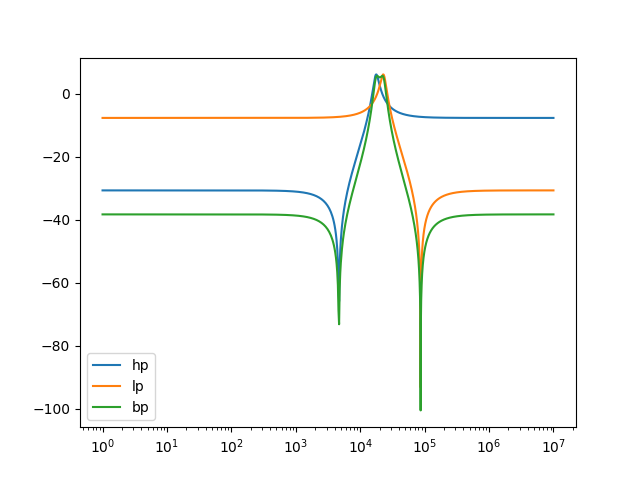

In [7]:
G = sp.lambdify(w, result, 'numpy')
F = sp.lambdify(w, Hlpnw_abs_num, 'numpy')

wrange = np.linspace(1, 10e6, 100000)

G = 20*np.log10(G(wrange))
F = 20*np.log10(F(wrange))


plt.figure()
plt.semilogx(wrange, G, label='hp')
plt.semilogx(wrange, F, label='lp')
plt.semilogx(wrange,F+G, label="bp")
plt.legend(loc='best')
plt.show()

In [8]:
result = result.subs(w, 20106.19)
sp.pprint(result)

1.35243605636490
